# Anlysis for Heart Disease

***

## Dataset Information

- age : Age of the patient
- sex : Sex of the patient (0 = female; 1 = male)
- cp : Chest Pain type
- exang: exercise induced angina (1 = yes; 0 = no)
- chol : cholestoral in mg/dl fetched via BMI sensor
- trtbps : resting blood pressure (in mm Hg)
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- thal:
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversable defect
- rest_ecg : resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- target :
  - 0 = less chance of heart attack
  - 1 = more chance of heart attack
- ca: number of major vessels (0-3)
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic


## Data Analysis Pipeline

***

- Data Collection
- Importing Data
- Exploring Data
- Data Cleaning
  - Handling Missing Data
  - Outlier Detection and Removal
- Exploring Data using Descriptive Statistics
  - Univariate
    - Histograms
    - Density Plot
  - Bivariate
    - Scatter Plot
    - Boxplot
  - Multivariate
    - Correlation Matrix

### Importing Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import plotly.express as px

# get colors for plotting hexadecimal colors
colors = ['#00B8AA', '#374649', '#37718E', '#254E70', '#2F4858']
palette='YlGnBu'
sns.color_palette(palette)
df = pd.read_csv('./heart.csv')
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data explotarion and cleaning

***

- The variables types are:
  - Binary: sex, fbs, exang, target
  - Categorical: cp, restecg, slope, ca, thal
  - Continuous: age, trestbps, chol, thalac, oldpeak


In [2]:
# Shape of the data
df.shape


(303, 14)

In [3]:
# Data types of the columns
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.nunique()


age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### Comment

We can see that **ca** has five values and **thal** has four values


In [6]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [7]:
# Filter df
df[df['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [8]:
df.loc[df['ca'] == 4, 'ca'] = np.NaN
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [9]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [10]:
df.loc[df['thal'] == 0, 'thal'] = np.NaN
df.loc[df['thal'] == 3, 'thal'] = 7
df.loc[df['thal'] == 2, 'thal'] = 6
df.loc[df['thal'] == 1, 'thal'] = 3
df['thal'].unique()

array([ 3.,  6.,  7., nan])

In [11]:
# Check duplicates rows
duplicated = df[df.duplicated(keep=False)]
duplicated.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,NaN,6.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,NaN,6.0,1


<AxesSubplot:>

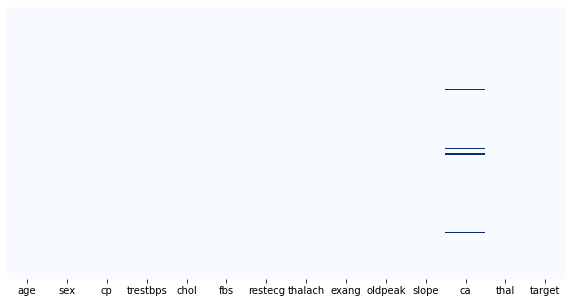

In [12]:
# Check missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

### Exploring Data using Descriptive Statistics


In [13]:
# summary statistics: using pandas
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [14]:
# summary stats using researchpy
rp.summary_cont(df)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,age,303.0,54.3663,9.0821,0.5218,53.3396,55.3931
1,sex,303.0,0.6832,0.4660,0.0268,0.6305,0.7359
2,cp,303.0,0.9670,1.0321,0.0593,0.8503,1.0837
3,trestbps,303.0,131.6238,17.5381,1.0075,129.6411,133.6065
4,chol,303.0,246.2640,51.8308,2.9776,240.4046,252.1235
5,fbs,303.0,0.1485,0.3562,0.0205,0.1082,0.1888
6,restecg,303.0,0.5281,0.5259,0.0302,0.4686,0.5875
7,thalach,303.0,149.6469,22.9052,1.3159,147.0574,152.2363
8,exang,303.0,0.3267,0.4698,0.0270,0.2736,0.3798
9,oldpeak,303.0,1.0396,1.1611,0.0667,0.9083,1.1709


In [15]:
features = ['age', 'trestbps', 'chol', 'oldpeak', 'thalach']
df.groupby('target')[features].aggregate(['min', np.median, np.mean, 'max'])

age                       trestbps                         chol         \
       min median       mean max      min median        mean  max  min median   
target                                                                          
0       35     58  56.601449  77      100    130  134.398551  200  131    249   
1       29     52  52.496970  76       94    130  129.303030  180  126    234   

                        oldpeak                       thalach         \
              mean  max     min median      mean  max     min median   
target                                                                 
0       251.086957  409     0.0    1.4  1.585507  6.2      71    142   
1       242.230303  564     0.0    0.2  0.583030  4.2      96    161   

                         
              mean  max  
target                   
0       139.101449  195  
1       158.466667  202

### Transform data for plotting

In [16]:
df['target'] = df['target'].replace({1: 'Disease', 0: 'No_disease'})
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['cp'] = df['cp'].replace(
    {0: 'Typical_angina', 1: 'Atypical_angina', 2: 'Non-anginal pain', 3: 'Asymtomatic'})
df['exang'] = df['exang'].replace({1: 'Yes', 0: 'No'})
df['fbs'] = df['fbs'].replace({1: 'True', 0: 'False'})
df['slope'] = df['slope'].replace(
    {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
df['thal'] = df['thal'].replace(
    {3: 'Fixed_defect', 6: 'Reversable_defect', 7: 'Normal'})


## Data Visualitation


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'ca'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

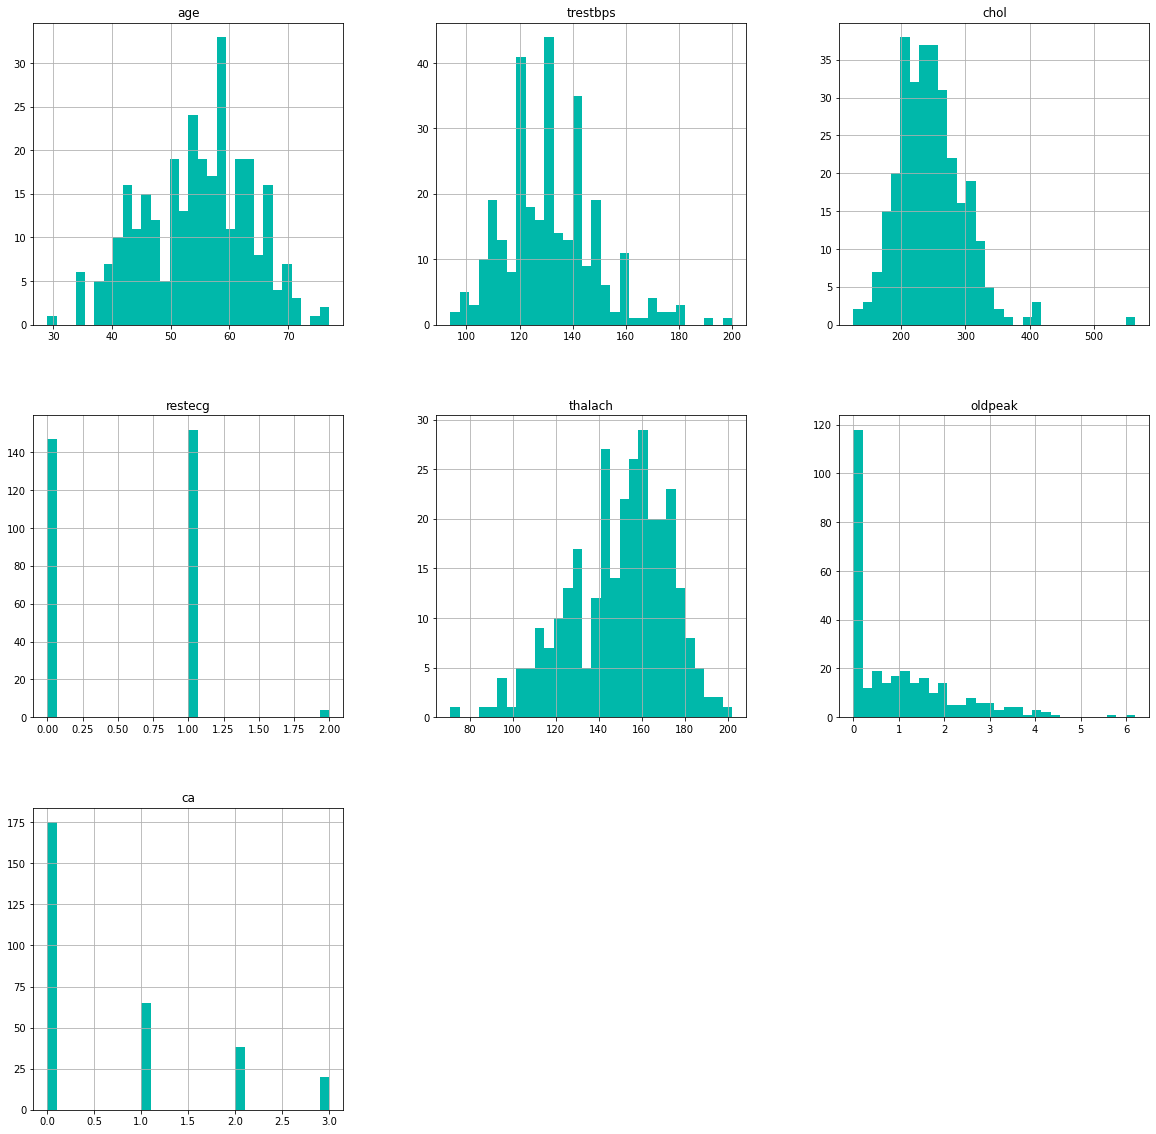

In [17]:
df.hist(bins=30, figsize=(20, 20), color=colors[0])

age            AxesSubplot(0.125,0.536818;0.0945122x0.343182)
trestbps    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
chol        AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
restecg     AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
thalach     AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
oldpeak     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ca          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
dtype: object

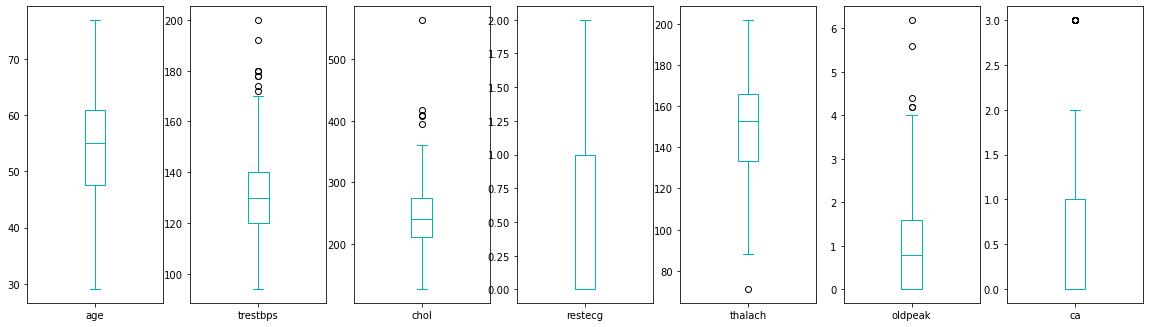

In [18]:
df.plot(kind='box', subplots=True, layout=(2, 7), sharex=False,
        sharey=False, figsize=(20, 12), color=colors[0])

In [19]:
px.box(df, x='target', y='chol')


#### Target Distribution

In [20]:
px.histogram(df, x="target",color='target',text_auto=True)


#### Age distribution

Text(0, 0.5, 'Age distribution')

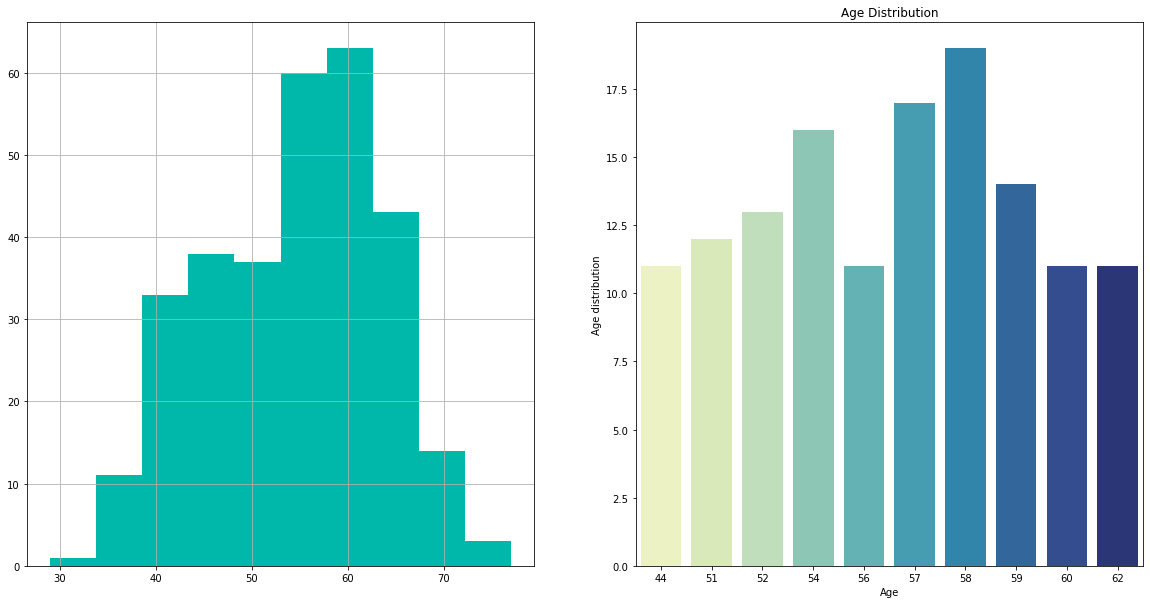

In [21]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20,10))
plt.title('Age Distribution')

df['age'].hist(ax=axis1,color=colors[0]).plot(kind='bar')

sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values,ax=axis2,palette=palette)
plt.xlabel('Age')
plt.ylabel('Age distribution')

[Text(0.5, 0, 'Age Without Heart Disease')]

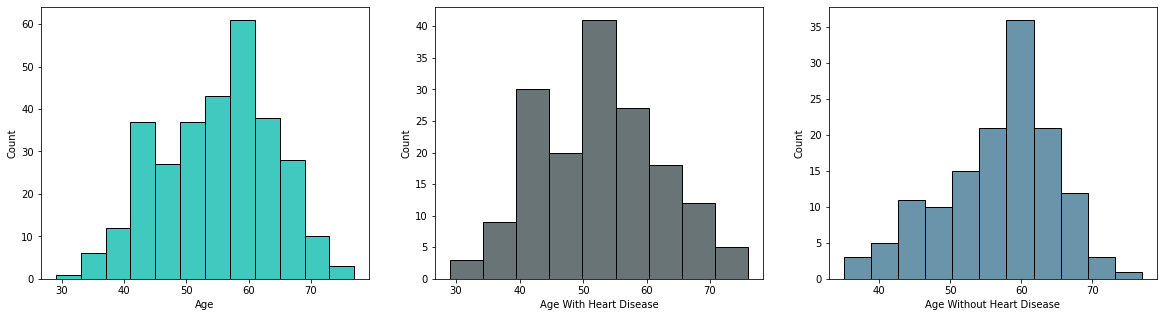

In [22]:
group_by_disease = df.groupby('target')['age']
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(20, 5))
ax = sns.histplot(df['age'], ax=axis1, color=colors[0])
ax.set(xlabel='Age')
ax = sns.histplot(group_by_disease.get_group('Disease'), ax=axis2, color=colors[1])
ax.set(xlabel='Age With Heart Disease')
ax = sns.histplot(group_by_disease.get_group('No_disease'), ax=axis3, color=colors[2])
ax.set(xlabel='Age Without Heart Disease')


sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

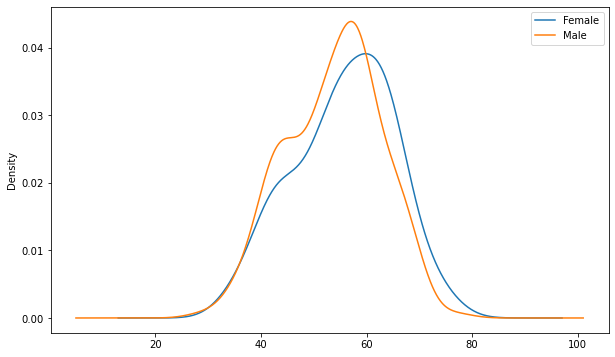

In [23]:
plt.figure(figsize=(10, 6))
df.groupby('sex')['age'].plot(kind='kde', legend=True)


<AxesSubplot:xlabel='sex', ylabel='count'>

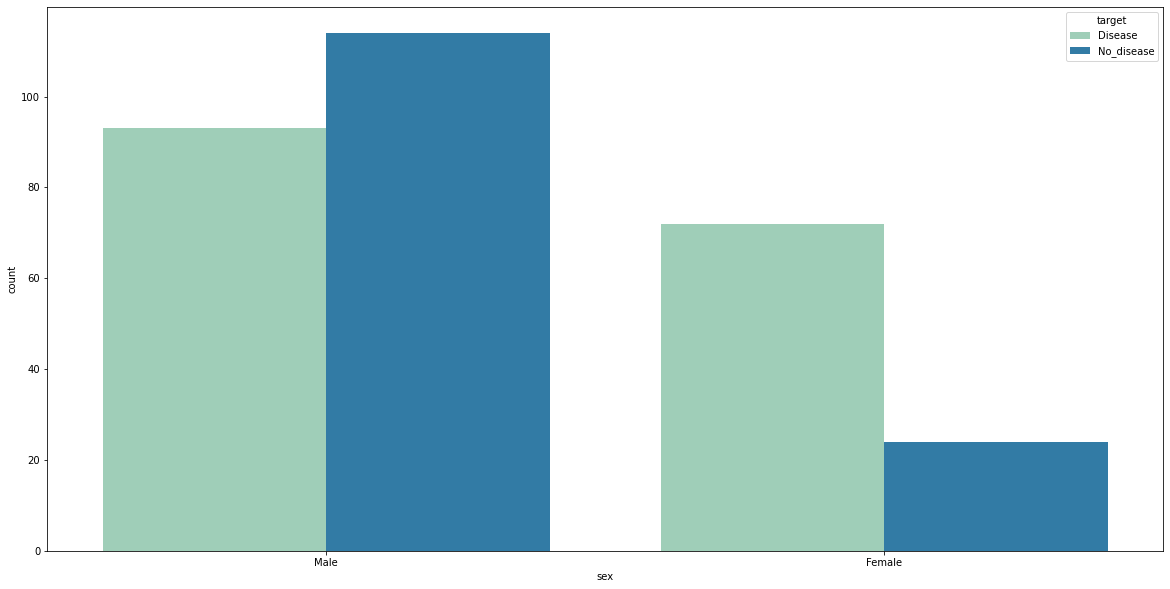

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='sex', hue='target', data=df, palette=palette)

<AxesSubplot:xlabel='cp', ylabel='count'>

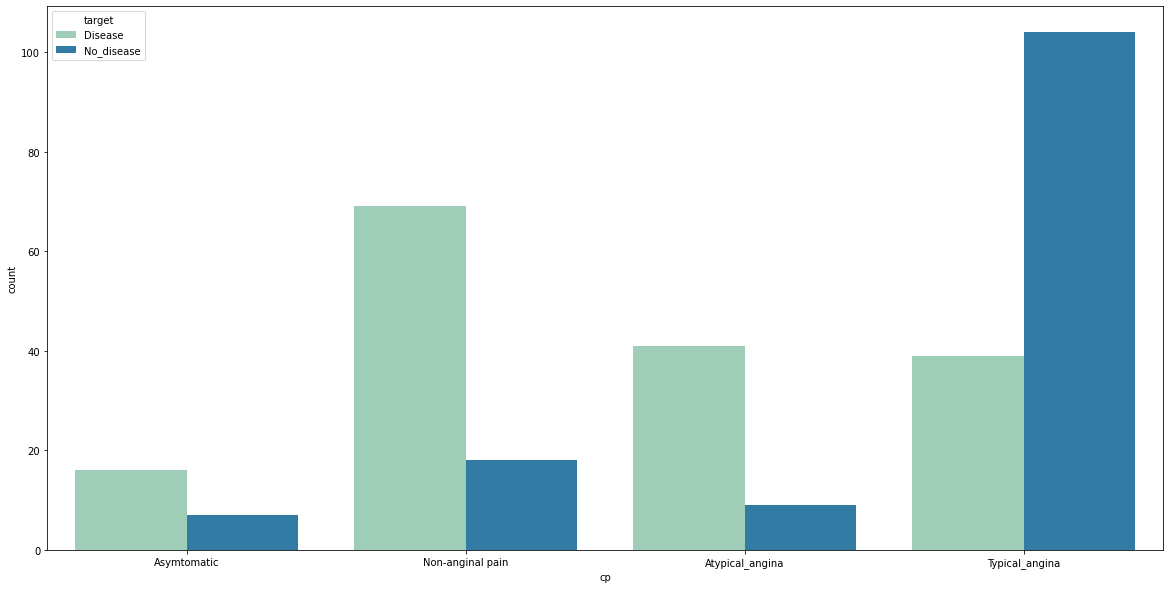

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='cp', hue='target', data=df, palette=palette)

<AxesSubplot:title={'center':'Fasting blood suggar distribution according to the target'}, xlabel='fbs', ylabel='count'>

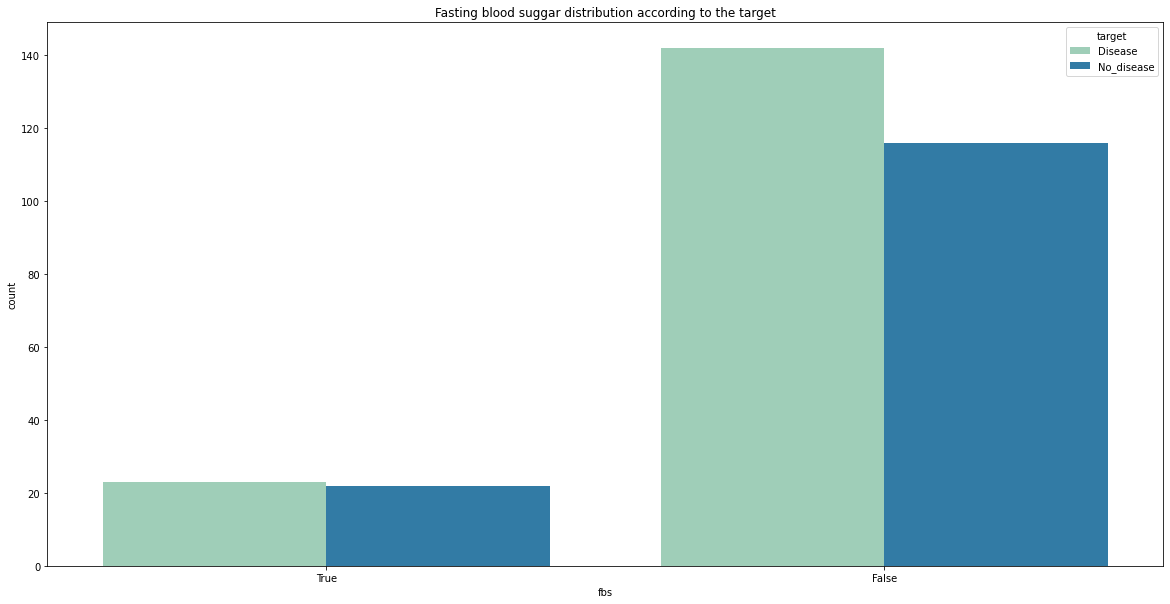

In [26]:
plt.figure(figsize=(20,10))
plt.title('Fasting blood suggar distribution according to the target')
sns.countplot(x='fbs', hue='target', data=df, palette=palette)

<AxesSubplot:title={'center':'Slope distribution according to the target'}, xlabel='slope', ylabel='count'>

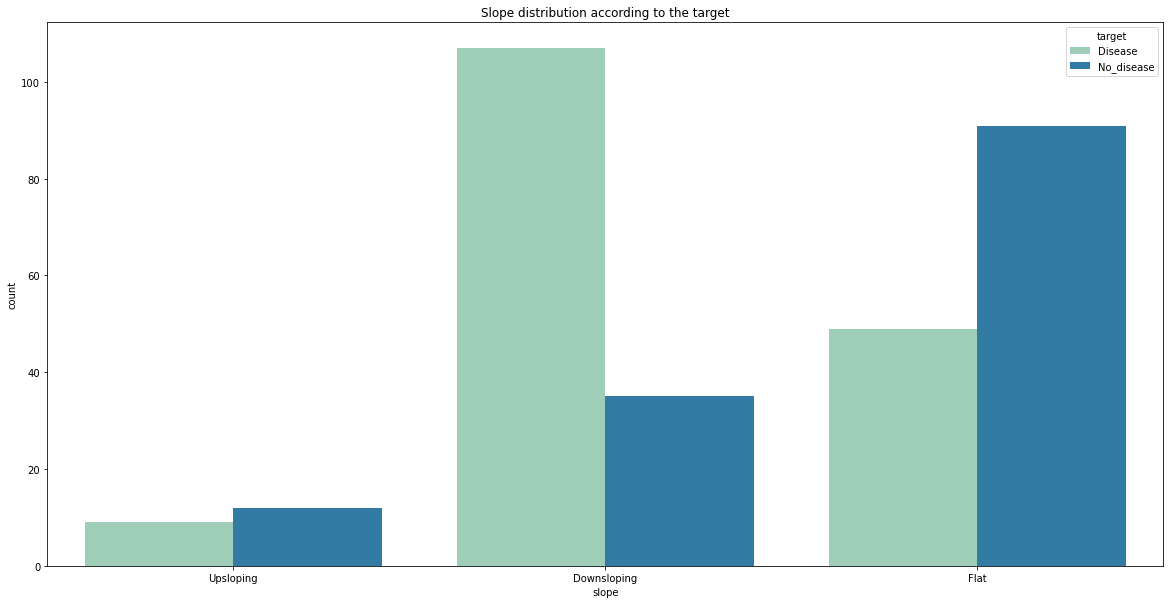

In [27]:
plt.figure(figsize=(20,10))
plt.title('Slope distribution according to the target')
sns.countplot(x='slope', hue='target', data=df, palette=palette)

<AxesSubplot:title={'center':'Distribution of fasting blood sugar by the age and sex'}, xlabel='fbs', ylabel='age'>

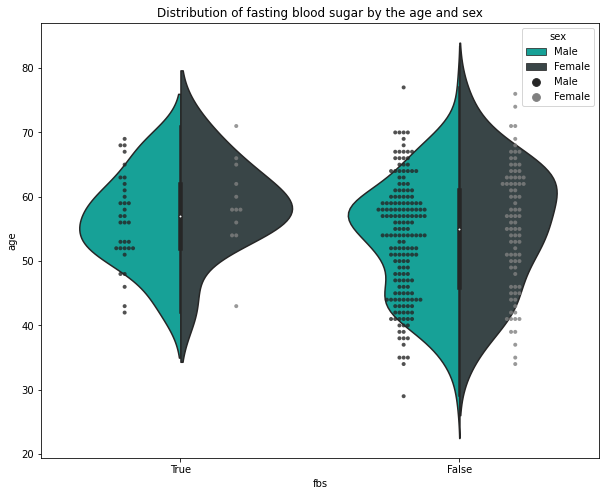

In [28]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.title('Distribution of fasting blood sugar by the age and sex')
sns.violinplot(x='fbs', y="age", data=df, hue='sex',
               split='True', palette=colors)
sns.swarmplot(x='fbs', y="age", data=df, hue='sex',
              dodge='True', color='grey', alpha=.8, s=4)


<AxesSubplot:title={'center':'Target distribution'}, xlabel='target', ylabel='count'>

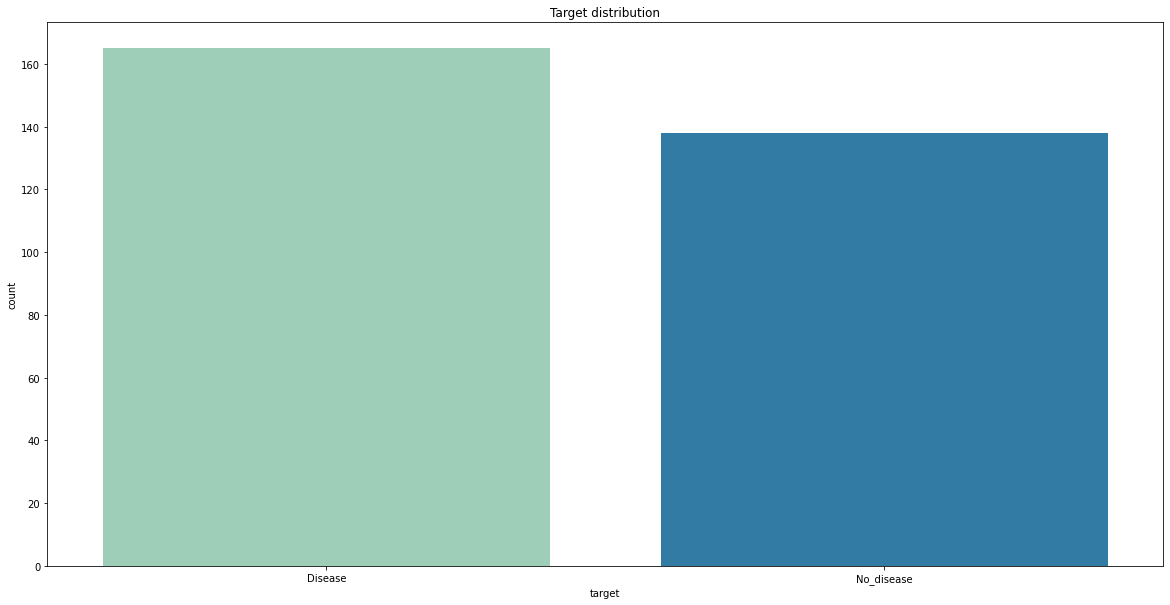

In [29]:
plt.figure(figsize=(20,10))
plt.title('Target distribution')
sns.countplot(x='target', data=df, palette=palette)

### Distribution plot on continuous variables


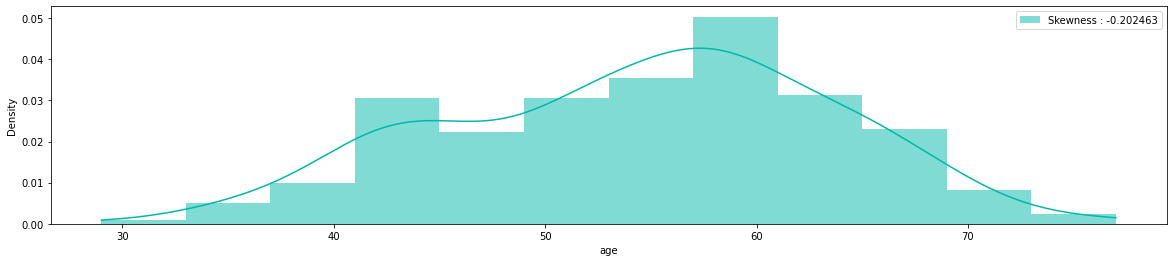

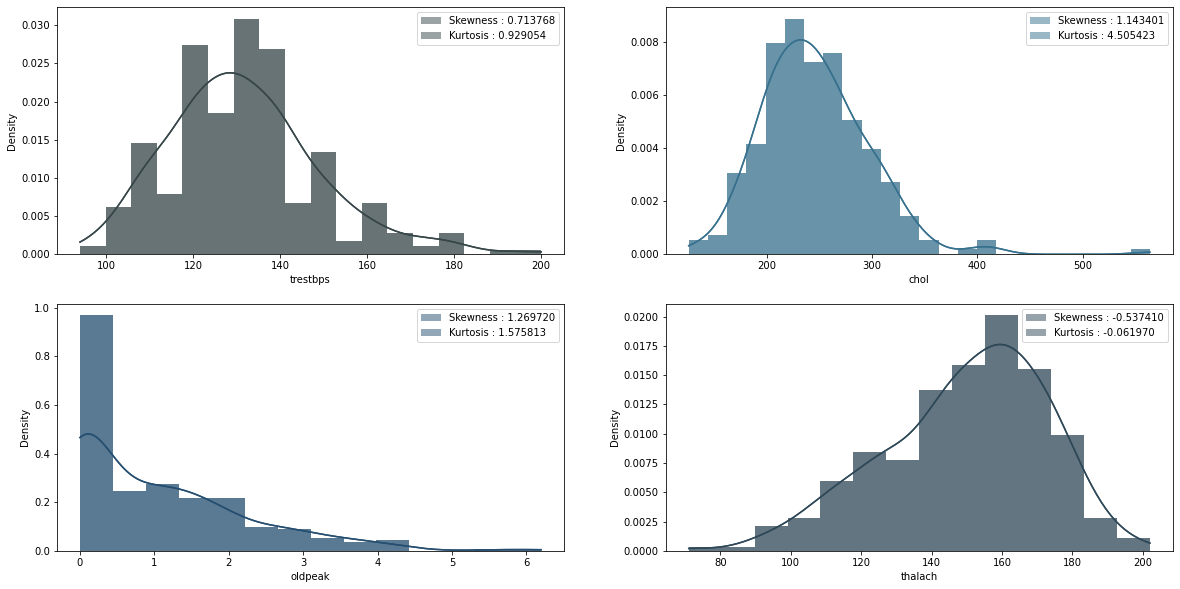

In [30]:
plt.figure(figsize=(20, 4))

sns.histplot(df['age'], color=colors[0],
             label='Skewness : {:2f}'.format(df['age'].skew()),kde=True, stat="density", linewidth=0)
plt.legend()

features = ['trestbps', 'chol', 'oldpeak', 'thalach']

plt.figure(figsize=(20, 10))

for i in range(1, len(features) + 1):
    ax = plt.subplot(2, 2, i)
    ax = sns.histplot(
        df[features[i-1]], label='Skewness : {:2f}'.format(df[features[i-1]].skew()), color=colors[i],kde=True, stat="density", linewidth=0)
    ax = sns.histplot(df[features[i-1]], label='Kurtosis : {:2f}'.format(
        df[features[i-1]].kurtosis()), color=colors[i],kde=True, stat="density", linewidth=0)

    plt.legend(loc='best')


In [31]:
x = []

for i in range(0, len(df)):
    if((df['age'][i] > 0) and (df['age'][i] < 18)):
        x.append('young')
    elif((df['age'][i] > 18) and (df['age'][i] < 35)):
        x.append('young-adult')
    elif((df['age'][i] > 35) and (df['age'][i] < 55)):
        x.append('middle-adult')
    else:
        x.append('old-adult')

df['Group_Age'] = x


<AxesSubplot:xlabel='cp'>

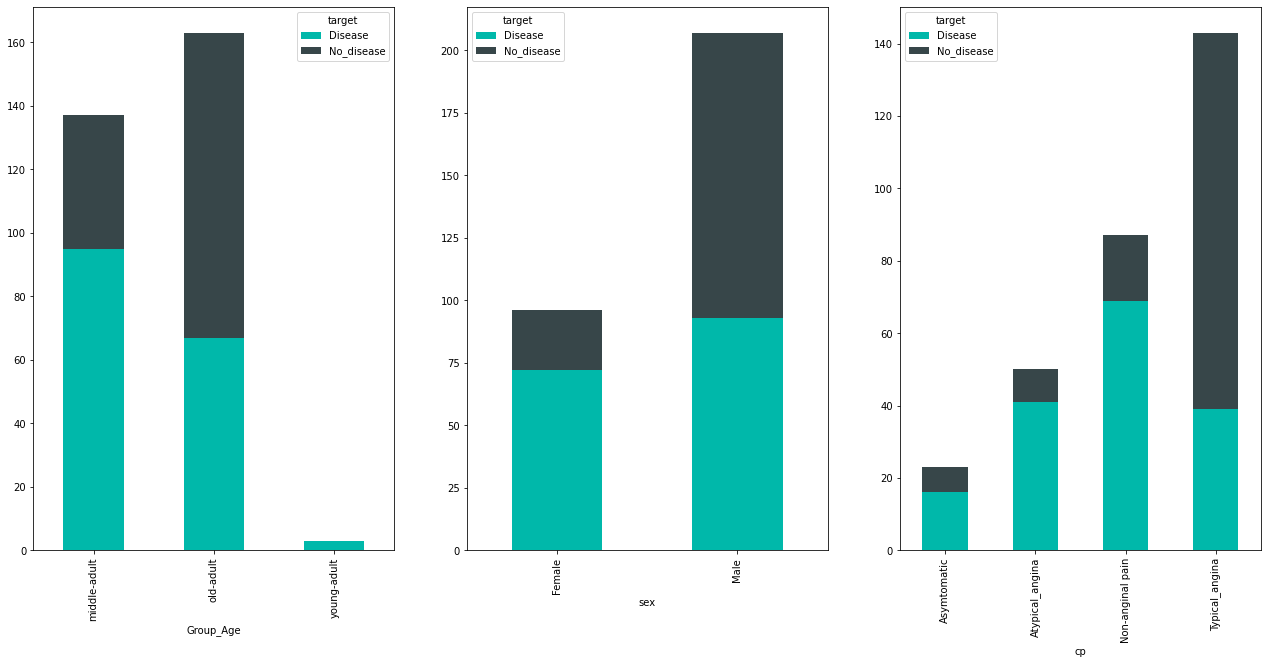

In [32]:

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(22, 10))

df.groupby(['Group_Age', 'target']).size().unstack().plot(
    kind='bar', stacked=True, ax=axis1, color=colors)
df.groupby(['sex', 'target']).size().unstack().plot(
    kind='bar', stacked=True, ax=axis2, color=colors)
df.groupby(['cp', 'target']).size().unstack().plot(
    kind='bar', stacked=True, ax=axis3, color=colors)


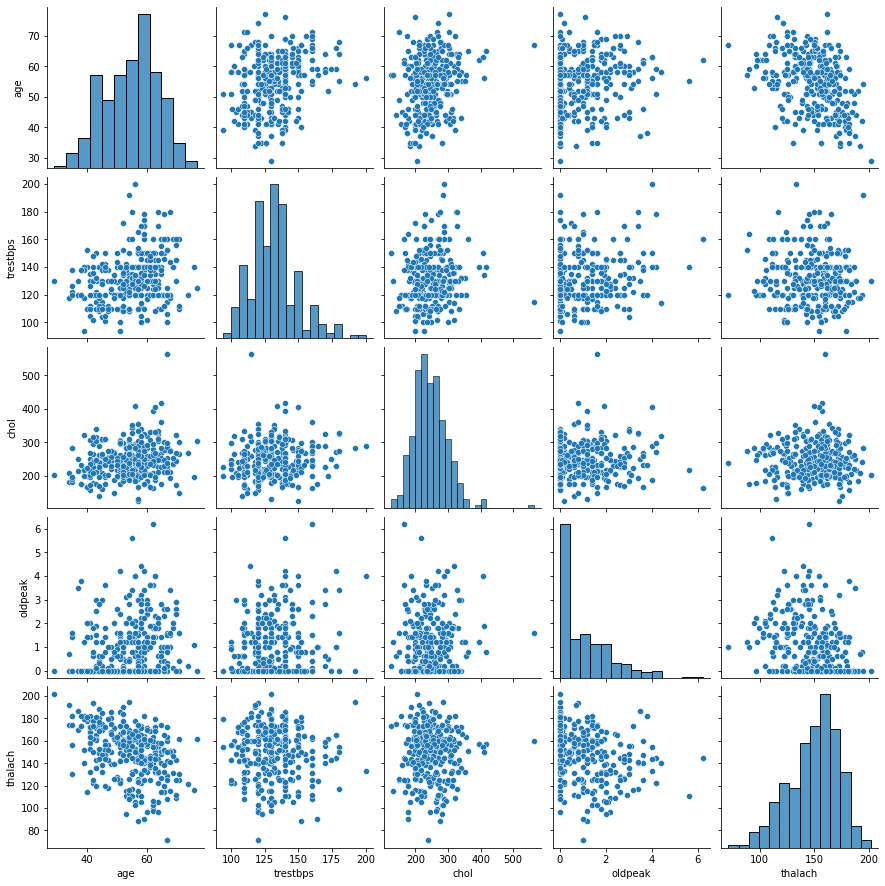

In [33]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'oldpeak', 'thalach'])

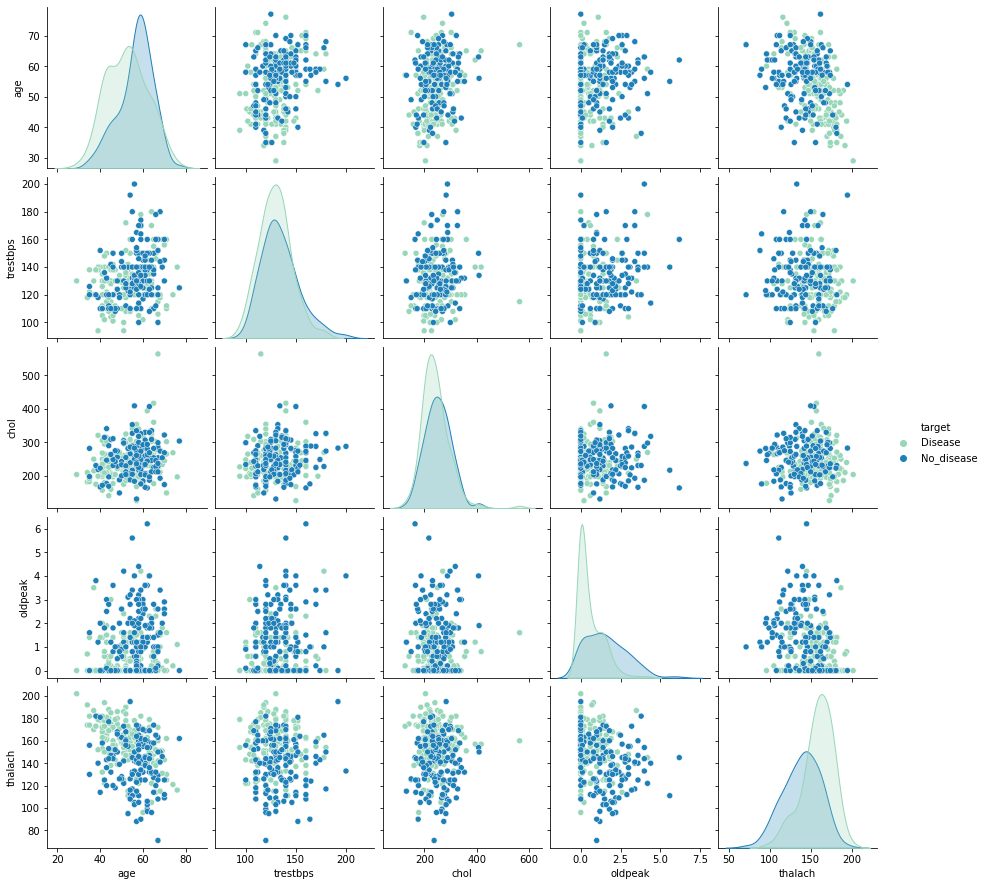

In [34]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol',
             'oldpeak', 'thalach'], hue='target',palette=palette)


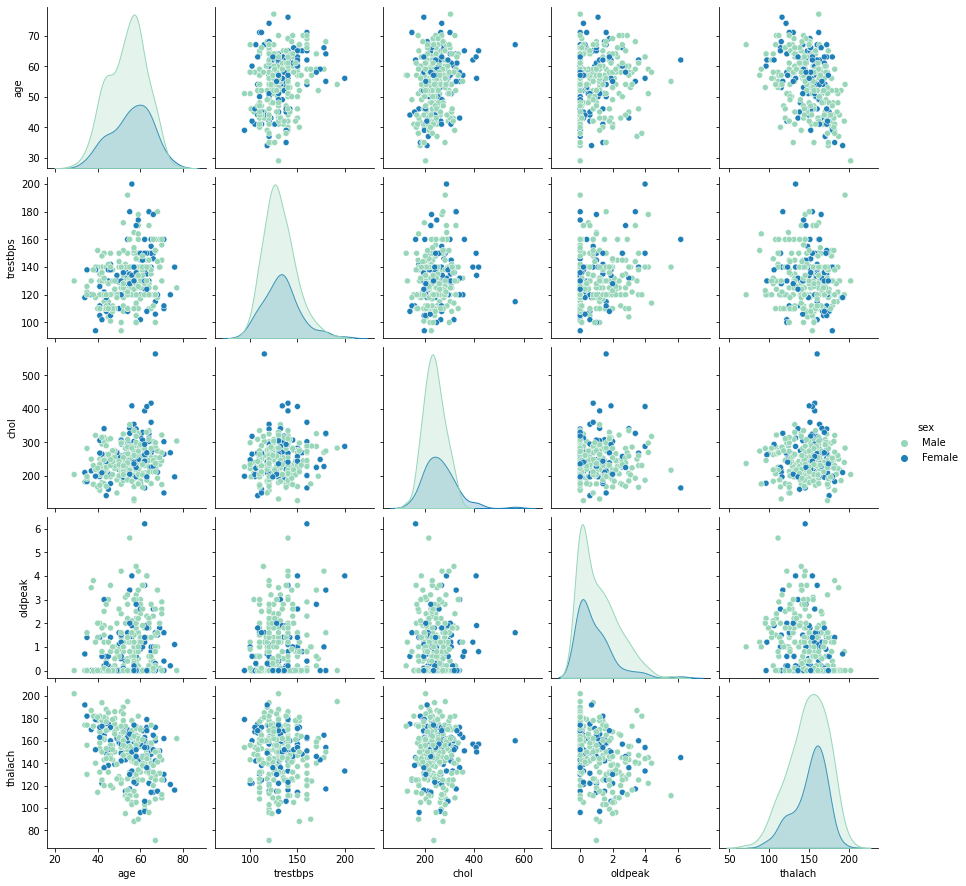

In [35]:
sns.pairplot(df, vars=['age', 'trestbps',
             'chol', 'oldpeak', 'thalach'], hue='sex',palette=palette)


<AxesSubplot:>

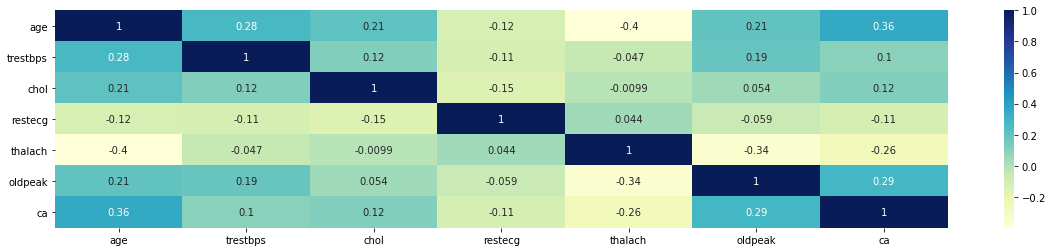

In [36]:
plt.figure(figsize=(20, 4))

correlations = df.corr()
sns.heatmap(correlations, annot=True,cmap=palette)
